In [2]:
from Scripts import gating, behaviour
from scipy.optimize import differential_evolution
from skopt import load, dump
import matplotlib.pyplot as plt
import numpy as np

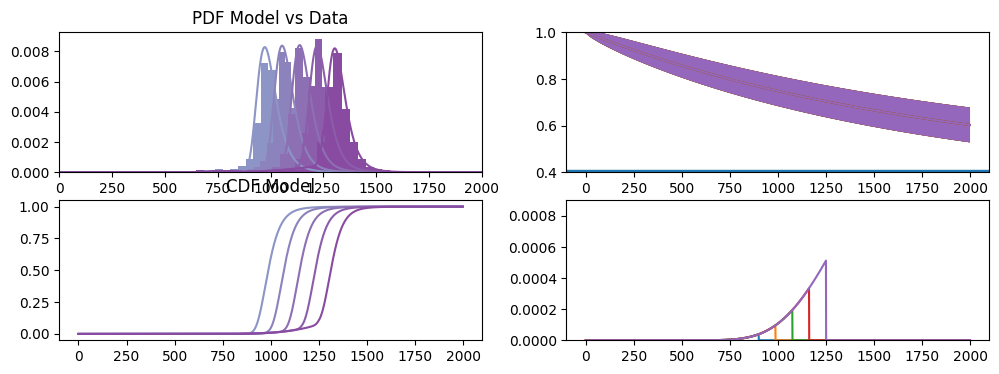

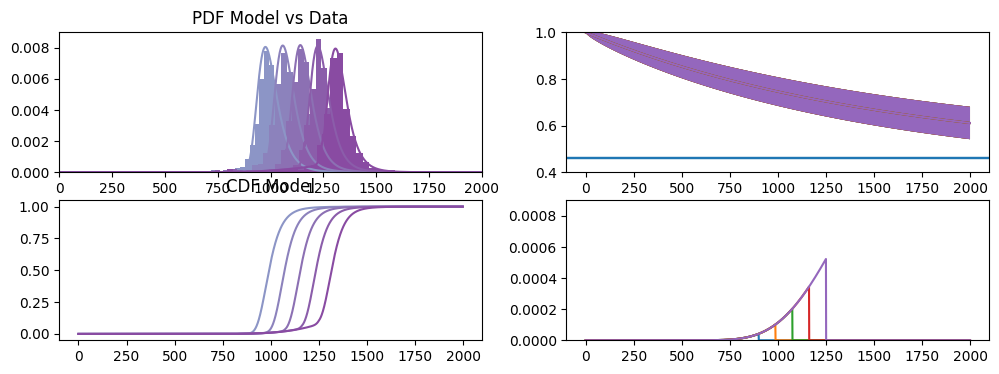

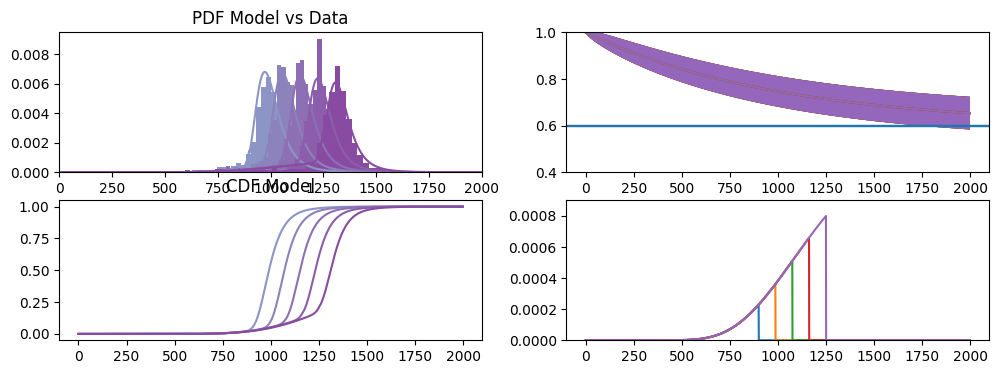

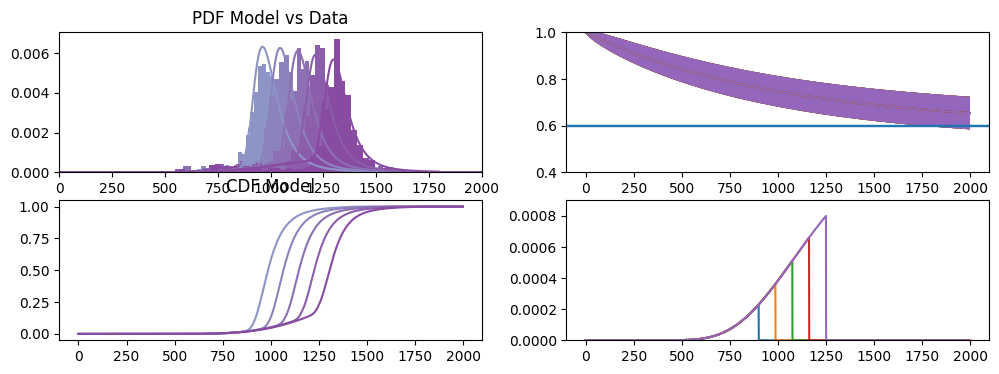

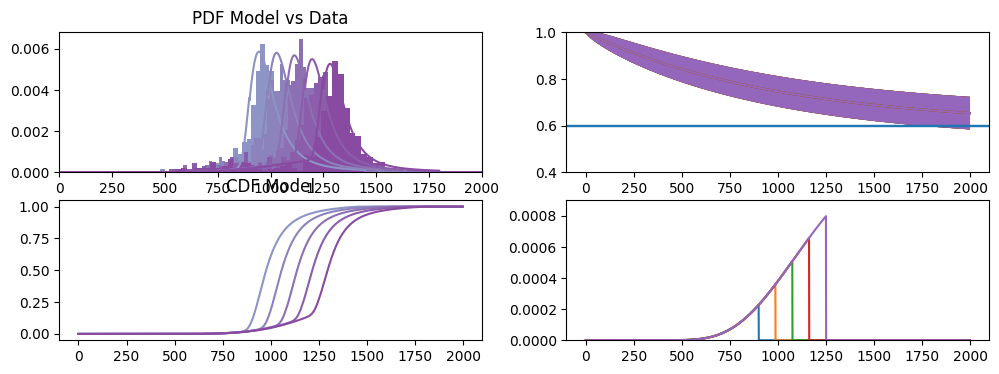

In [4]:
## Plot model output for repetitions
path = r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Behavioural_Data'

nback = 5
groupData = behaviour.combineBehaviour(path = path, all_key = True, 
                                       subj_key= 0, polarity_key = 0, exp_key = 0) # load data

for seq in range(nback): 
    repData = groupData.loc[groupData['Rep Number']== seq]
    modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_rep_{seq}')
    gating.plotBDIFit(modelFit = modelFit, params = None, data = repData, 
                   numBins = 5, minDelay = 750, maxDelay = 1100, plotLabel = f'repetition_fit_{seq}')


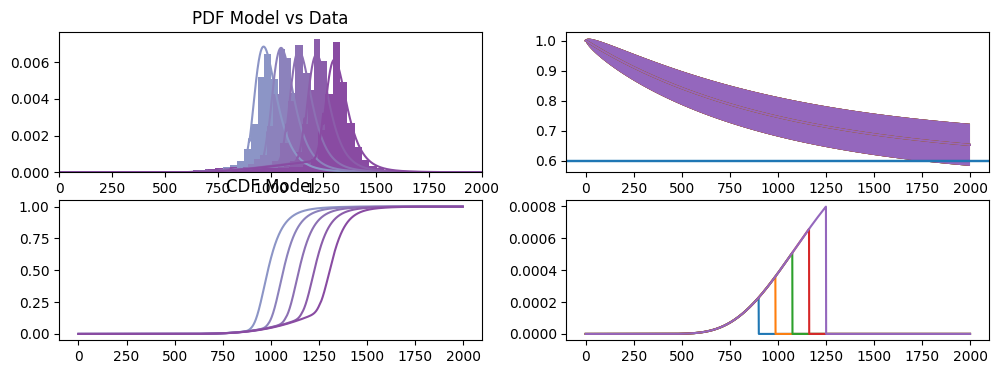

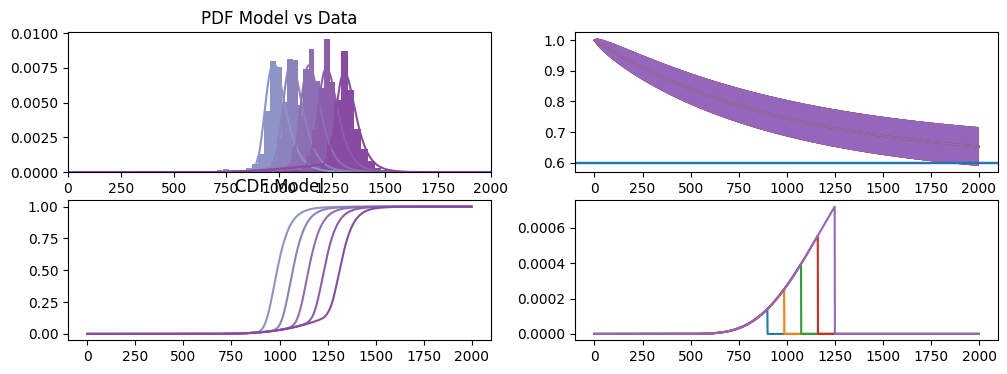

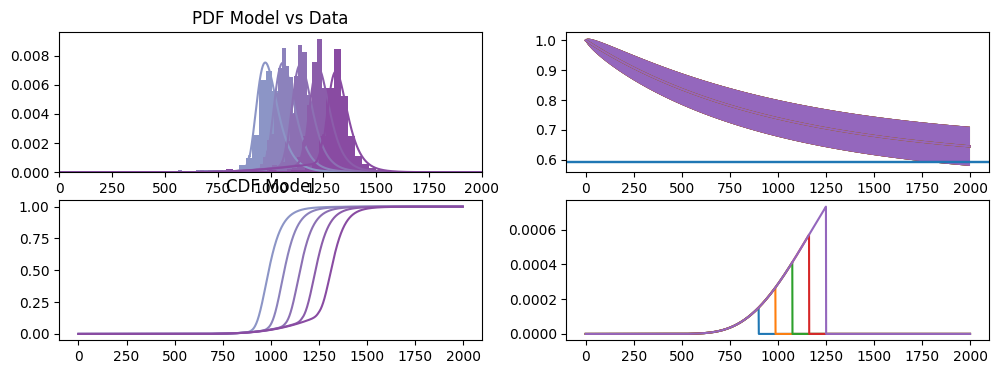

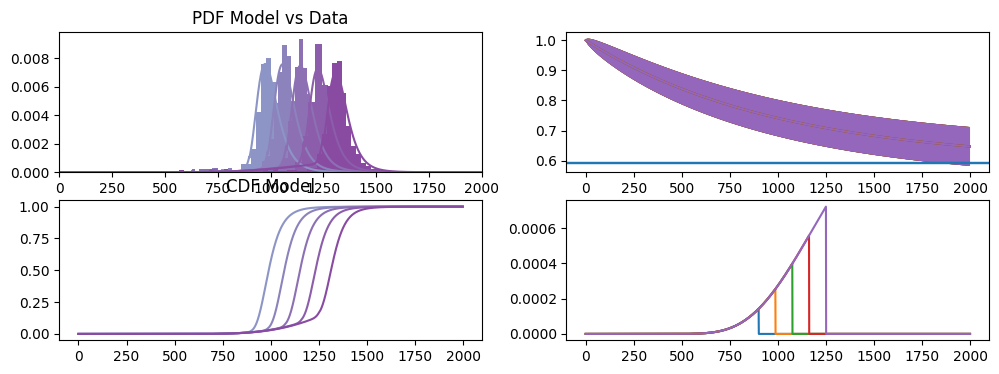

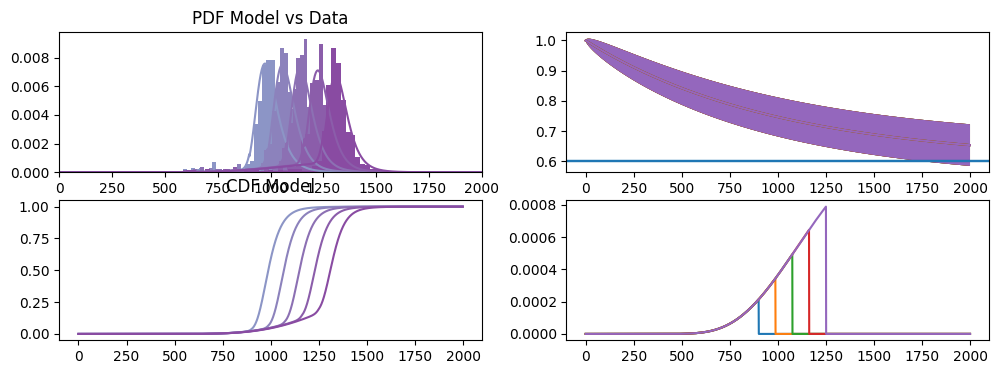

In [4]:
## Plot model output for alternations

for seq in range(nback): 
    altData = groupData.loc[groupData['Alt Number']== seq]
    modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Model_Fits\modelfit_group_alt_{seq}')
    gating.plotBDIFit(modelFit = modelFit, params = None, data = altData, 
                    numBins = 5, minDelay = 750, maxDelay = 1100, plotLabel = '')


In [ ]:
savefile = r'C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Figures'
gating.plotModelOutputs(sequence_type= 'rep', nback = 5, numDelays = 5, stat = 'Var', savefile = savefile)
gating.plotModelOutputs(sequence_type= 'alt', nback = 5, numDelays = 5, stat = 'Var', savefile = savefile)
gating.plotModelOutputs(sequence_type= 'rep', nback = 5, numDelays = 5, stat = 'Median', savefile = savefile)
gating.plotModelOutputs(sequence_type= 'alt', nback = 5, numDelays = 5, stat = 'Median', savefile = savefile)

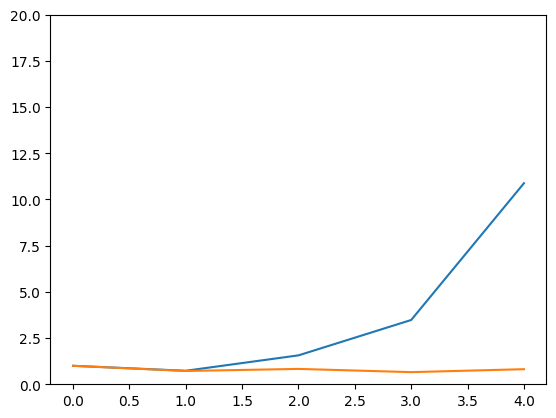

In [5]:
## Plot model errors for baseline dynamics fixing

plt.figure()
errors = np.zeros(nback)
for seq in range(nback):
    modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Gated Accumulation\Model Fits\modelfit_group_rep_{seq}_vary_baseline')
    errors[seq] = modelFit.fun
plt.plot(errors/errors[0])


for seq in range(nback):
    modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Gated Accumulation\Model Fits\modelfit_group_alt_{seq}_vary_baseline')
    errors[seq] = modelFit.fun
plt.plot(errors/errors[0])
plt.ylim([0, 20])
plt.savefig(rf"C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Figures\vary_baseline_repandalt", format='svg')




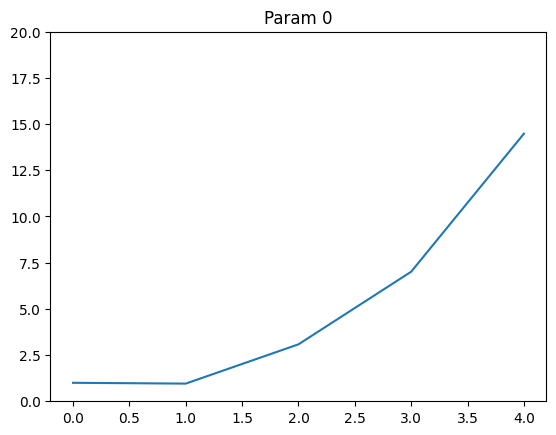

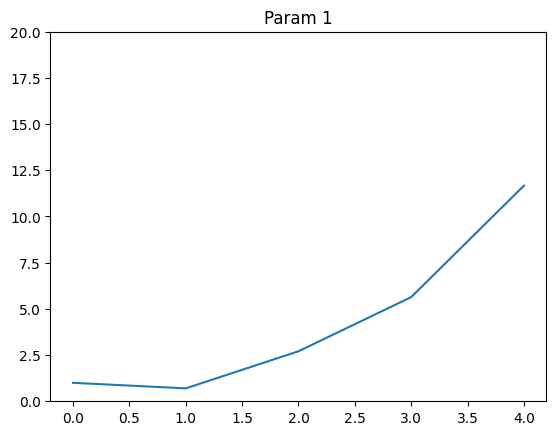

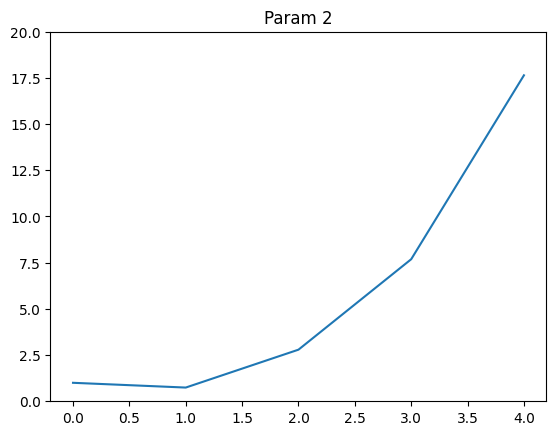

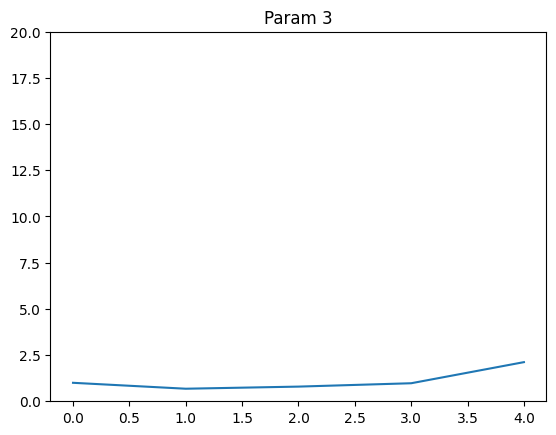

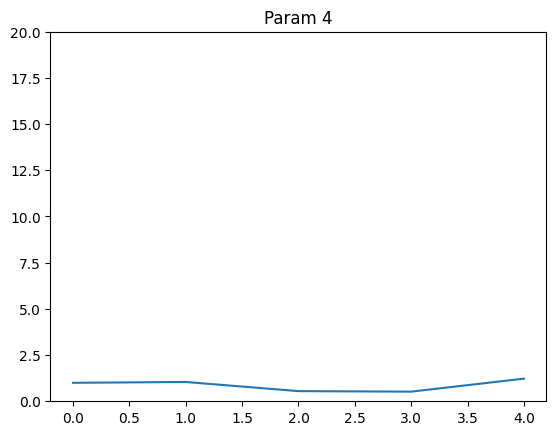

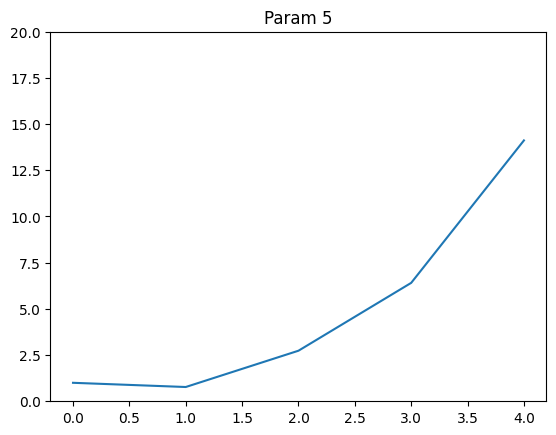

In [6]:
## Plot model error for parameter fixing
for param in range(6):
    plt.figure()
    errors = np.zeros(nback)
    for seq in range(nback):
        modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Gated Accumulation\Model Fits\modelfit_group_rep_{seq}_vary_{param}')
        errors[seq] = modelFit.fun
    plt.plot(errors/errors[0])
    plt.title(f'Param {param}')
    plt.ylim([0, 20])
    plt.savefig(rf"C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Figures\vary_param_{param}_rep_{seq}", format='svg')


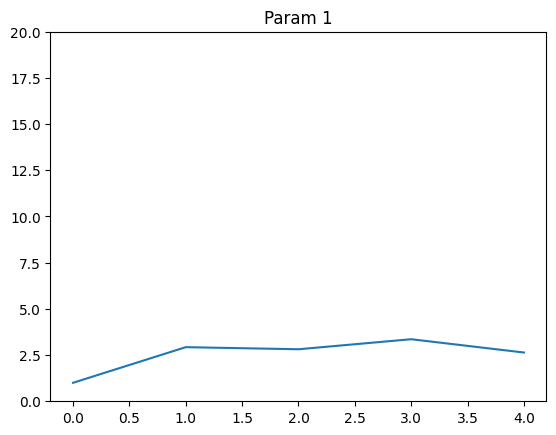

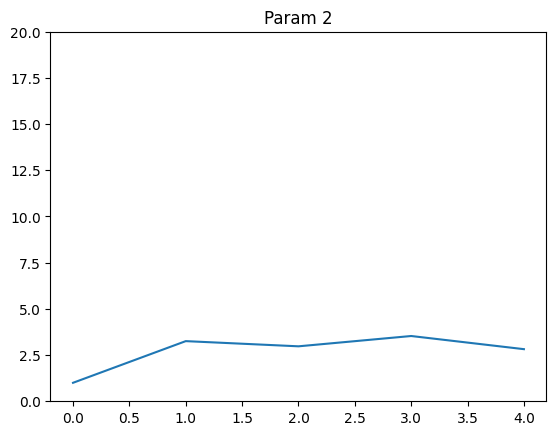

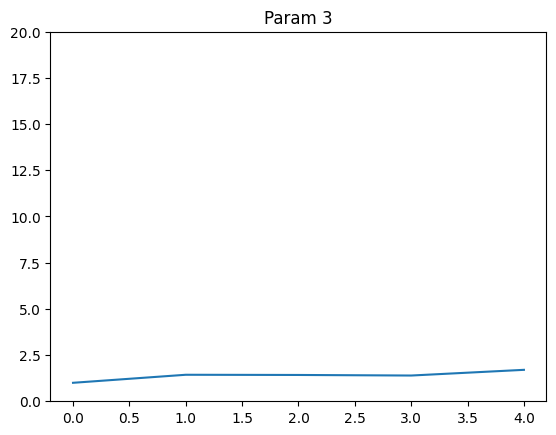

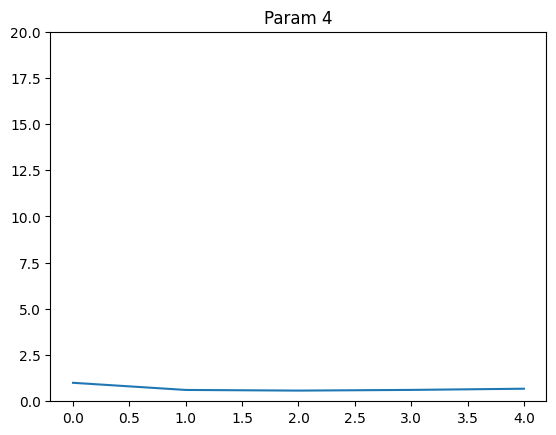

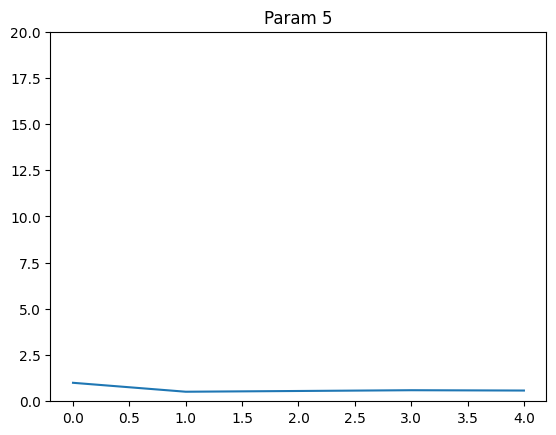

In [7]:
## Plot model error for parameter fixing
import matplotlib.pyplot as plt
import numpy as np
param_varies = np.array([1,2,3,4,5])
for param in param_varies:
    plt.figure()
    errors = np.zeros(nback)
    for seq in range(nback):
        modelFit = load(fr'C:\Users\Brandon\Desktop\PhD\Gated Accumulation\Model Fits\modelfit_group_alt_{seq}_vary_{param}')
        errors[seq] = modelFit.fun
    plt.plot(errors/errors[0])
    plt.title(f'Param {param}')
    plt.ylim([0, 20])
    plt.savefig(rf"C:\Users\Brandon\Desktop\PhD\Baseline Dynamics\Baseline-Dynamics\Figures\vary_param_{param}_alt_{seq}", format='svg')
